# K-Nearest Neighbors

In [431]:
import warnings
warnings.filterwarnings('ignore')

KNN is an effective classification and regression algorithm that uses nearby points in order to generate a prediction. 

The K-Nearest Neighbors algorithm works as follows:

    Choose a point
    Find the K-nearest points
        K is a predefined user constant such as 1, 3, 5, or 11
    Predict a label for the current point:
        Classification - Take the most common class of the k neighbors
        Regression - Take the average target metric of the k neighbors
        
### Distance metrics

An incredibly important decision when using the KNN algorithm is determining an appropriate distance metric. This makes a monumental impact to the output of the algorithm. While there are additional distance metrics, such as cosine distance which we will not cover, you'll get a solid introduction to distance metrics by looking at the standard Euclidean distance and its more generic counterpart, Manhattan distance.

In [432]:
# Locations of two points A and B
A = (4, 5, 9)
B = (12, -7, 9)


### Manhattan distance

The first (and easiest) distance metric you'll cover is Manhattan distance. Manhattan distance is aptly named, because it measures the distance from one point to another traveling along the axes of a grid. Take a look at the following image:

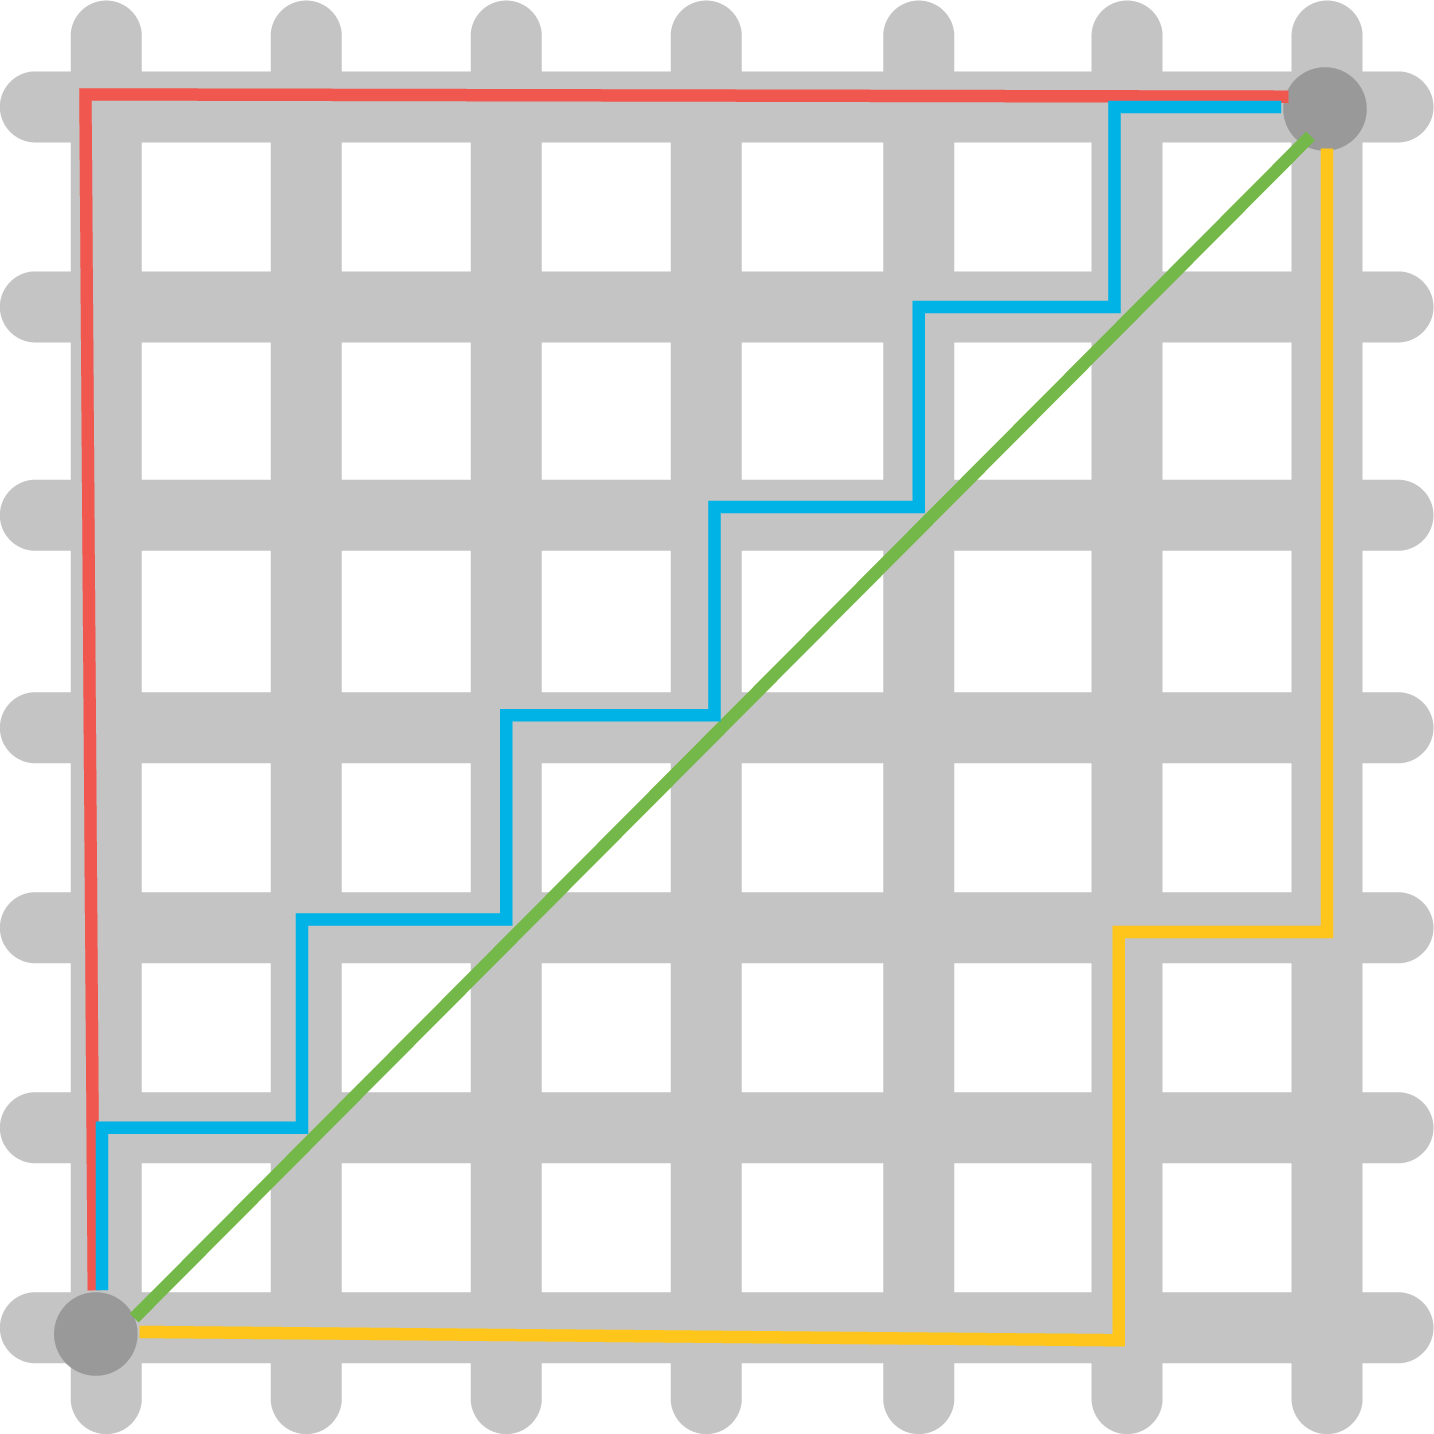

In this image, all the lines except for the green line measure the Manhattan distance between the two points. You'll notice that if you start from the point in the bottom left corner of the grid and count the number of units moved in the X dimension (left and right) and the number of units moved in the Y dimension (up and down), the distance is the same for the red, blue, and yellow line

$$
d(x, y) = \sum_{i=1}^{n} \left| x_i - y_i \right|
$$


In [433]:
manhattan_distance = 0

# Use a for loop to iterate over each element
for i in range(3):
    # Calculate the absolute difference and add it
    manhattan_distance += abs(A[i] - B[i])

manhattan_distance

20

## Euclidean distance
The next and most common distance metric is Euclidean distance. The equation at the heart of this one is probably familiar to you: a 2 + b 2 = c 2 , or the Pythagorean theorem! 

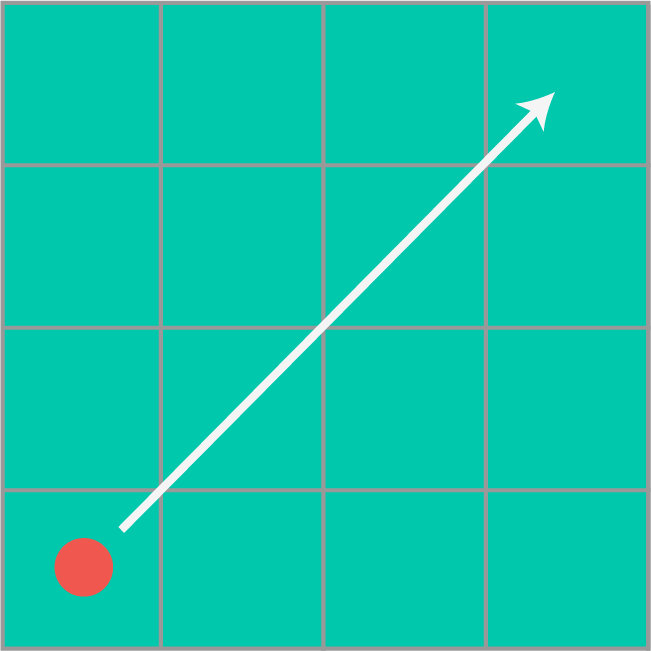


formulae

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$


In [434]:
from math import sqrt

# Locations of two points A and B
A = (2, 3, 5)
B = (1, -1, 3)

euclidean_distance = 0

# Use a for loop to iterate over each element
for i in range(3):
    # Calculate the difference, square, and add it
    euclidean_distance += (A[i] - B[i]) ** 2

# Square root of the final result
euclidean_distance = sqrt(euclidean_distance)

euclidean_distance

4.58257569495584

## Finding the best value for K

While the best value for K is not immediately obvious for any problem, there are some strategies that you can use to select a good or near optimal value. 

### K, overfitting, and underfitting

In general, the smaller K is, the tighter the "fit" of the model. Remember that with supervised learning, you want to fit a model to the data as closely as possible without overfitting to patterns in the training set that don't generalize. This can happen if your model pays too much attention to every little detail and makes a very complex decision boundary. Conversely, if your model is overly simplistic, then you may have underfit the model, limiting its potential. A visual explanation helps demonstrate this concept in practice:

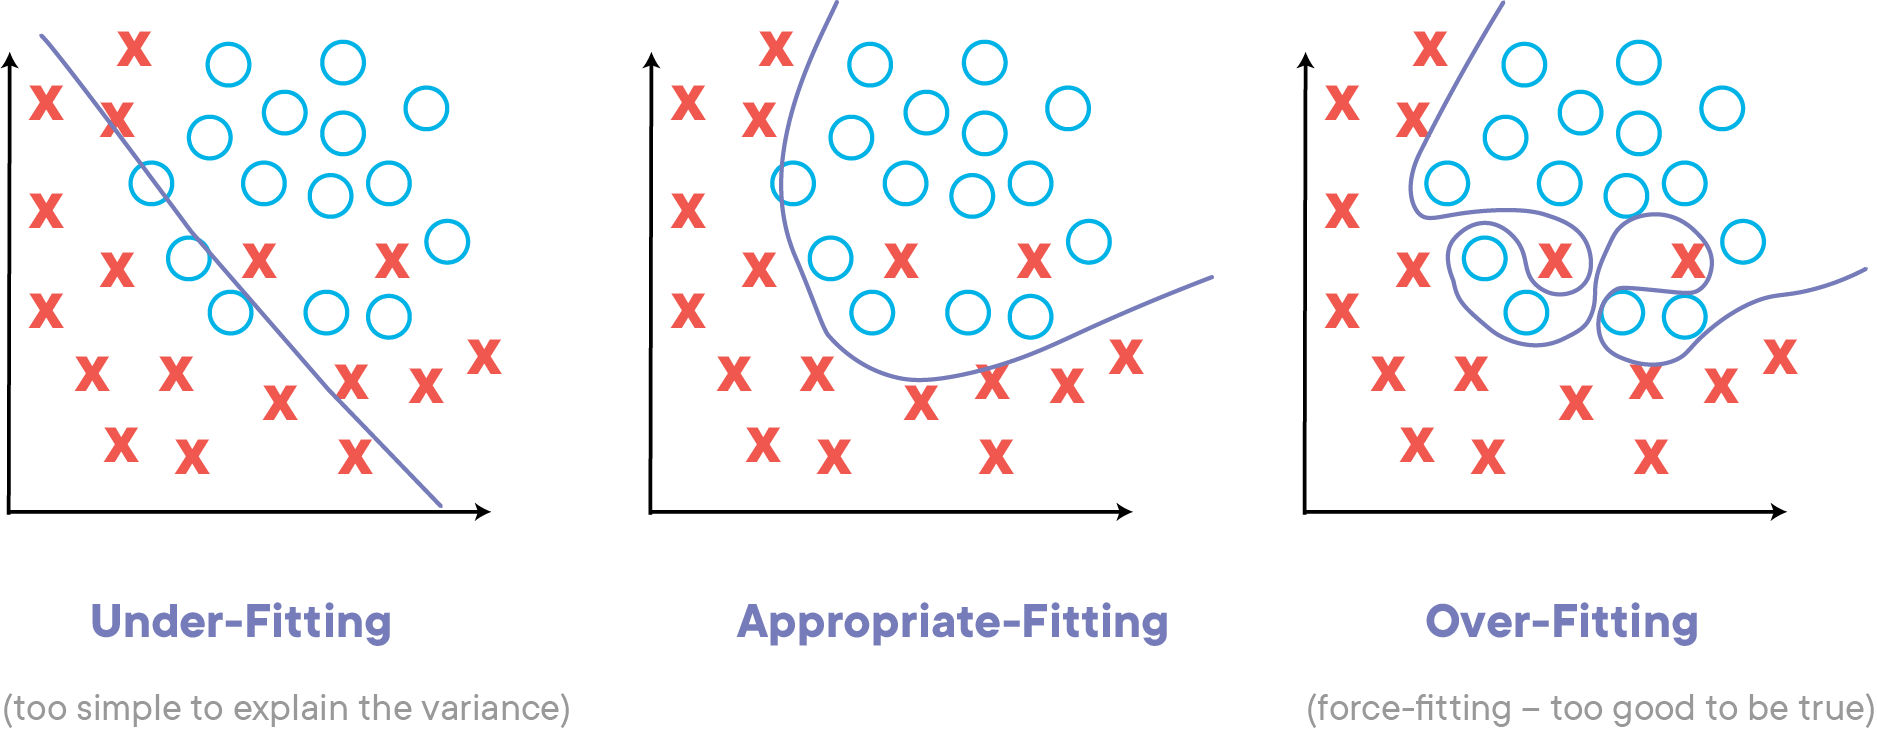

## Iterating over values of K

Since the model arrives at a prediction by voting, it makes sense that you should only use odd values for k, to avoid ties and subsequent arbitrary guesswork. By adding this constraint (an odd value for k) the model will never be able to evenly split between two classes. From here, finding an optimal value of K requires some iterative investigation.

The best way to find an optimal value for K is to choose a minimum and maximum boundary and try them all! In practice, this means:

    Fit a KNN classifier for each value of K
    Generate predictions with that model
    Calculate and evaluate a performance metric using the predictions the model made
    Compare the results for every model and find the one with the lowest overall error, or highest overall score!


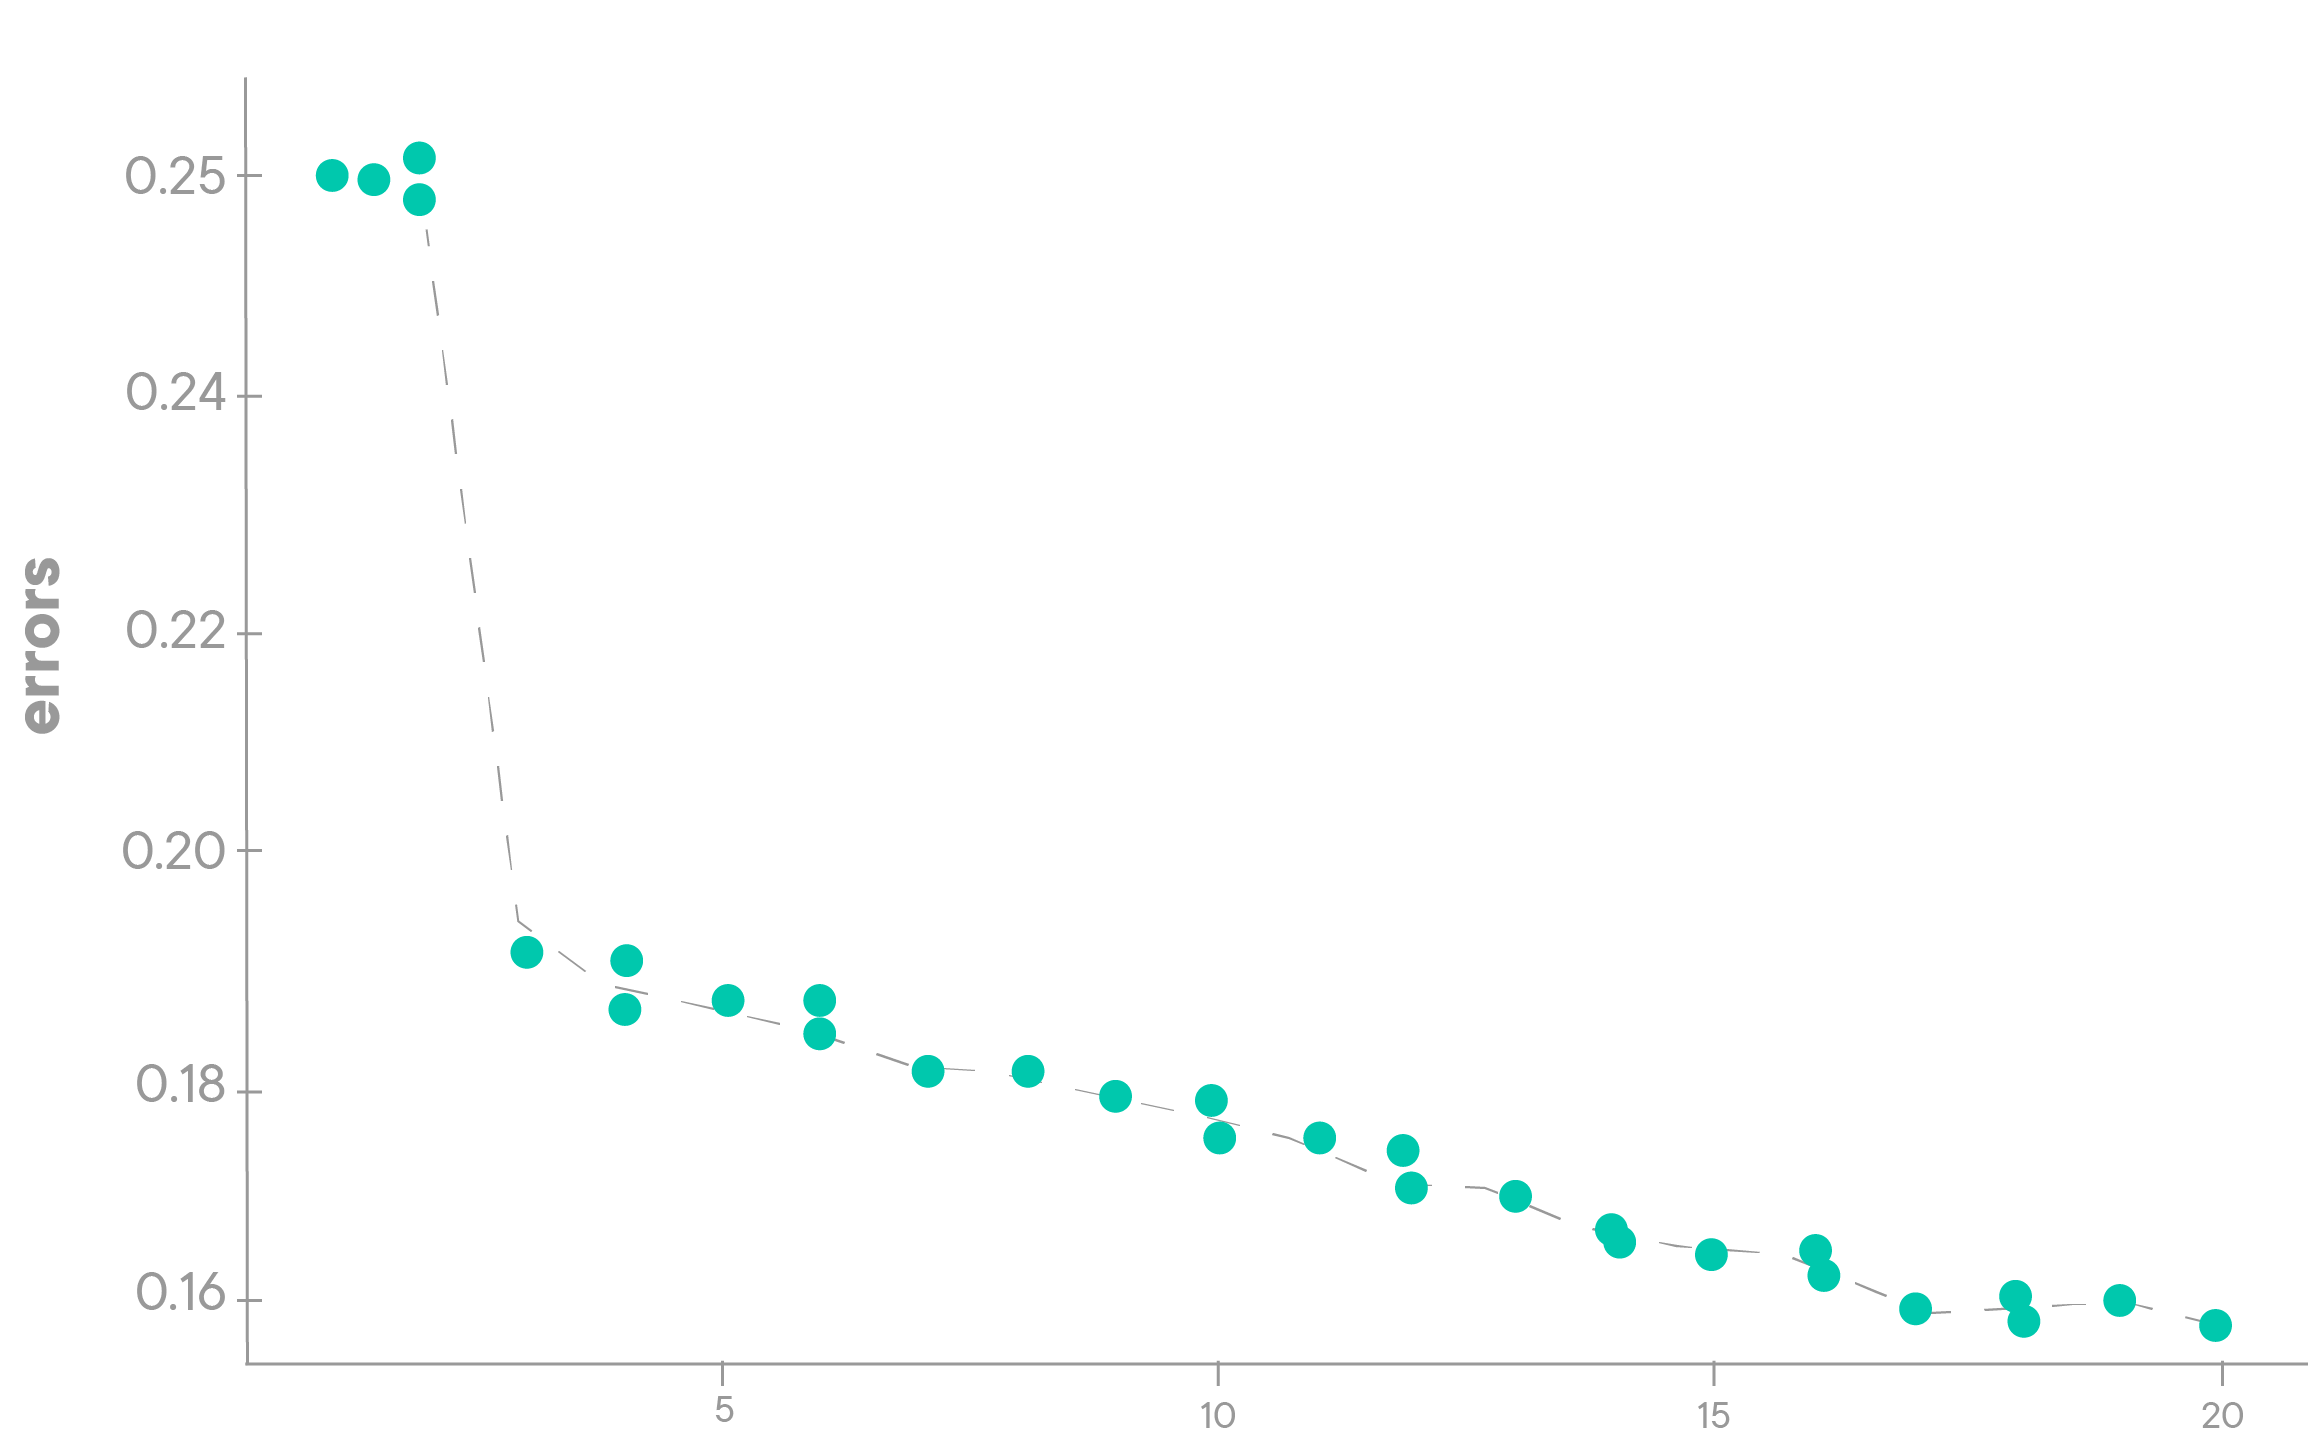

### KNN and the curse of dimensionality

Note that KNN isn't the best choice for extremely large datasets, and/or models with high dimensionality. This is because the time complexity (what computer scientists call "Big O") of this algorithm is exponential. As you add more data points to the dataset, the number of operations needed to complete all the steps of the algorithm grows exponentially! That said, for smaller datasets, KNN often works surprisingly well, given the simplicity of the overall algorithm. However, if your dataset contains millions of rows and thousands of columns, you may want to choose another algorithm, as the algorithm may not run in any reasonable amount of time;in some cases, it could quite literally take years to complete! 

## KNN With scikit-learn

In [435]:
# imports
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
# load the data

df = pd.read_csv("./data/Iris.csv")
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [437]:
df.shape

(150, 6)

In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [439]:
X = df.drop("Species",axis=1)
y = df["Species"]

In [440]:
X_train,X_test,y_train,y_test =  train_test_split(X,y)

In [441]:
# modeling 
model  =  KNeighborsClassifier(n_neighbors=1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [442]:
print(classification_report(y_pred=y_pred,y_true=y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [443]:
# Example 2

df2 =  pd.read_csv("./data/WineQT.csv",index_col="Id")
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [444]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [445]:
X = df2.drop("quality",axis=1)
y = df2["quality"]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [446]:
y.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [447]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [448]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

## classification report

print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.62      0.60      0.61       106
           6       0.47      0.53      0.49        89
           7       0.42      0.30      0.35        27
           8       0.00      0.00      0.00         3

    accuracy                           0.52       229
   macro avg       0.30      0.29      0.29       229
weighted avg       0.52      0.52      0.52       229



## Elbow Curve Method 

<Axes: >

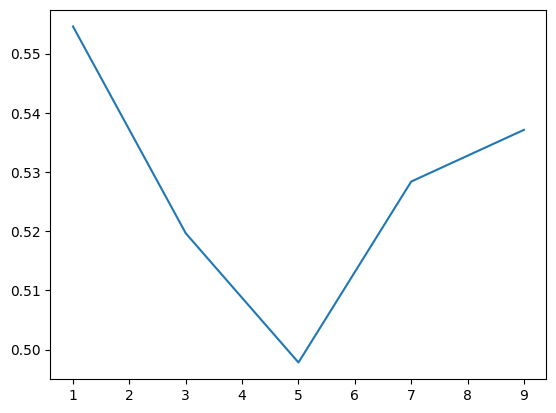

In [449]:
acc = []
for k in range(1,10,2):
    # Create KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)

# Plotting 
    
sns.lineplot(x=range(1,10,2),y=acc)

In [450]:
model =  KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.62      0.60      0.61       106
           6       0.47      0.53      0.49        89
           7       0.42      0.30      0.35        27
           8       0.00      0.00      0.00         3

    accuracy                           0.52       229
   macro avg       0.30      0.29      0.29       229
weighted avg       0.52      0.52      0.52       229



## Example with logistic regression

In [451]:
from sklearn.linear_model import LogisticRegression 


model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.70      0.76      0.73       106
           6       0.53      0.65      0.59        89
           7       0.50      0.07      0.13        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       229
   macro avg       0.35      0.30      0.29       229
weighted avg       0.59      0.62      0.58       229



## Random Forest

In [452]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.79      0.75      0.77       106
           6       0.63      0.73      0.68        89
           7       0.60      0.56      0.58        27
           8       0.00      0.00      0.00         3

    accuracy                           0.69       229
   macro avg       0.40      0.41      0.40       229
weighted avg       0.68      0.69      0.69       229

